In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [10]:
df = pd.read_csv('state_data.csv', index_col=0)

df["winner"] = df['Election Result'].apply(lambda x: 1 if x > 0 else 0)

df.drop(columns=["Election Result"], inplace=True)

df.head()

,total population,% White,% Black,% Asian,% Hispanic,Union Membership,Urbanization,% Buddhist,% Jewish,% Hindu,% Muslim,% Christian,% with College Degree,Median Age,winner
state,,,,,,,,,,,,,,,
Alabama,5108468,64.7,25.4,2.1,5.7,7.5,57.7,1.0,1.0,1.0,1.0,88.0,26.703532,39.5,1
Alaska,733406,59.6,2.9,9.1,7.5,14.8,64.9,1.0,1.0,1.0,1.0,64.0,28.979858,36.1,1
Arizona,7431344,58.3,4.8,5.3,31.6,4.2,89.3,1.0,2.0,1.0,1.0,67.0,30.853004,39.2,1
Arkansas,3067732,68.9,14.4,2.2,9.1,5.1,55.5,1.0,1.0,1.0,2.0,81.0,24.298995,38.7,1
California,38965193,38.5,5.4,18.4,40.4,15.4,94.2,2.0,2.0,2.0,1.0,63.0,34.639426,38.2,0


In [11]:
X = df.drop(columns=["winner"])
y = df["winner"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

Accuracy: 0.9090909090909091
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.86      1.00      0.92         6

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

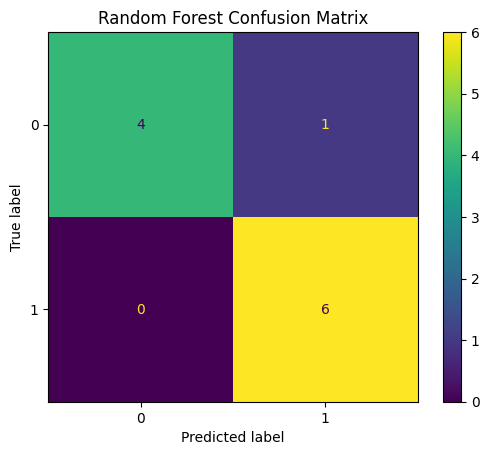

In [13]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

classificationRep = classification_report(y_test, y_pred)
print("Classification Report: \n", classificationRep)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.title("Random Forest Confusion Matrix")